In [1]:
from pysb import *
from pysb.export import export
from pysb.bng import generate_network, generate_equations
from pysb.pathfinder import set_path
from pysb.simulator import ScipyOdeSimulator, BngSimulator
from pylab import linspace, plot, xlabel, ylabel, show

import seaborn
import matplotlib.pyplot as plt

palette = seaborn.color_palette('colorblind')

set_path('bng', '/shared/D1/opt/git-repositories/bionetgen.RuleWorld/bng2/')
# set_path('bng', '/opt/git-repositories/bionetgen.RuleWorld/bng2/')

/usr/lib/python3/dist-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
Model()

<Model '_interactive_' (monomers: 0, rules: 0, parameters: 0, expressions: 0, compartments: 0) at 0x7f94cc647c50>

In [3]:
Monomer('cplx', ['name', 'dna', 'rna'], { 'name' : ['RNAP', 'Ribosome']})
Monomer('dna', ['name', 'type', 'prot'], 
        { 'name' : ['lacZ', 'lacY', 'lacA'], 
          'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})
Monomer('rna', ['name', 'type', 'prot'], 
        { 'name' : ['lacZ', 'lacY', 'lacA'], 
          'type' : ['pro1', 'pro2', 'pro3', 'pro4', 'rbs', 'cds', 'ter1', 'ter2']})
Monomer('prot', ['name', 'up', 'dw'],
        { 'name' : ['lacZ', 'lacY', 'lacA']})

Monomer('prot', ['name', 'up', 'dw'], {'name': ['lacZ', 'lacY', 'lacA']})

In [4]:
Rule('docking_lacZ_pro4', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro4', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro4', prot = 1), Parameter('fwd_docking_lacZ_pro4', 1), Parameter('rvs_docking_lacZ_pro4', 1))
Rule('docking_lacZ_pro3', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro3', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro3', prot = 1), Parameter('fwd_docking_lacZ_pro3', 1), Parameter('rvs_docking_lacZ_pro3', 1))
Rule('docking_lacZ_pro2', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro2', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro2', prot = 1), Parameter('fwd_docking_lacZ_pro2', 1), Parameter('rvs_docking_lacZ_pro2', 1))
Rule('docking_lacZ_pro1', cplx(name = 'RNAP', dna = None) + dna(name = 'lacZ', type = 'pro1', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro1', prot = 1), Parameter('fwd_docking_lacZ_pro1', 1), Parameter('rvs_docking_lacZ_pro1', 1))
Rule('docking_lacY_pro1', cplx(name = 'RNAP', dna = None) + dna(name = 'lacY', type = 'pro1', prot = None) | cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'pro1', prot = 1), Parameter('fwd_docking_lacY_pro1', 1), Parameter('rvs_docking_lacY_pro1', 1))
Rule('falloff_lacA_ter1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter1', prot = 1) >> cplx(name = 'RNAP', dna = None) + dna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_falloff_lacA_ter1', 1))
Rule('falloff_lacA_ter2', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter2', prot = 1) >> cplx(name = 'RNAP', dna = None) + dna(name = 'lacA', type = 'ter2', prot = None), Parameter('fwd_falloff_lacA_ter2', 1))

Rule('falloff_lacA_ter2', cplx(name='RNAP', dna=1) % dna(name='lacA', type='ter2', prot=1) >> cplx(name='RNAP', dna=None) + dna(name='lacA', type='ter2', prot=None), fwd_falloff_lacA_ter2)

In [5]:
Rule('sliding_lacZ_pro4', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro4', prot = 1) + None + dna(name = 'lacZ', type = 'pro3', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro3', prot = 1) + rna(name = 'lacZ', type = 'pro3', prot = None) + dna(name = 'lacZ', type = 'pro4', prot = None), Parameter('fwd_sliding_lacZ_pro4', 1))
Rule('sliding_lacZ_pro3', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro3', prot = 1) + None + dna(name = 'lacZ', type = 'pro2', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro2', prot = 1) + rna(name = 'lacZ', type = 'pro2', prot = None) + dna(name = 'lacZ', type = 'pro3', prot = None), Parameter('fwd_sliding_lacZ_pro3', 1))
Rule('sliding_lacZ_pro2', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro2', prot = 1) + None + dna(name = 'lacZ', type = 'pro1', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro1', prot = 1) + rna(name = 'lacZ', type = 'pro1', prot = None) + dna(name = 'lacZ', type = 'pro2', prot = None), Parameter('fwd_sliding_lacZ_pro2', 1))
Rule('sliding_lacZ_pro1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'pro1', prot = 1) + None + dna(name = 'lacZ', type = 'rbs', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'rbs', prot = 1) + rna(name = 'lacZ', type = 'rbs', prot = None) + dna(name = 'lacZ', type = 'pro1', prot = None), Parameter('fwd_sliding_lacZ_pro1', 1))
Rule('sliding_lacZ_rbs', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'rbs', prot = 1) + None + dna(name = 'lacZ', type = 'cds', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'cds', prot = 1) + rna(name = 'lacZ', type = 'cds', prot = None) + dna(name = 'lacZ', type = 'rbs', prot = None), Parameter('fwd_sliding_lacZ_rbs', 1))
Rule('sliding_lacZ_cds', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacZ', type = 'cds', prot = 1) + None + dna(name = 'lacY', type = 'pro1', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'pro1', prot = 1) + rna(name = 'lacY', type = 'pro1', prot = None) + dna(name = 'lacZ', type = 'cds', prot = None), Parameter('fwd_sliding_lacZ_cds', 1))
Rule('sliding_lacY_pro1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'pro1', prot = 1) + None + dna(name = 'lacY', type = 'rbs', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'rbs', prot = 1) + rna(name = 'lacY', type = 'rbs', prot = None) + dna(name = 'lacY', type = 'pro1', prot = None), Parameter('fwd_sliding_lacY_pro1', 1))
Rule('sliding_lacY_rbs', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'rbs', prot = 1) + None + dna(name = 'lacY', type = 'cds', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'cds', prot = 1) + rna(name = 'lacY', type = 'cds', prot = None) + dna(name = 'lacY', type = 'rbs', prot = None), Parameter('fwd_sliding_lacY_rbs', 1))
Rule('sliding_lacY_cds', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacY', type = 'cds', prot = 1) + None + dna(name = 'lacA', type = 'rbs', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'rbs', prot = 1) + rna(name = 'lacA', type = 'rbs', prot = None) + dna(name = 'lacY', type = 'cds', prot = None), Parameter('fwd_sliding_lacY_cds', 1))
Rule('sliding_lacA_rbs', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'rbs', prot = 1) + None + dna(name = 'lacA', type = 'cds', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'cds', prot = 1) + rna(name = 'lacA', type = 'cds', prot = None) + dna(name = 'lacA', type = 'rbs', prot = None), Parameter('fwd_sliding_lacA_rbs', 1))
Rule('sliding_lacA_cds', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'cds', prot = 1) + None + dna(name = 'lacA', type = 'ter1', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter1', prot = 1) + rna(name = 'lacA', type = 'ter1', prot = None) + dna(name = 'lacA', type = 'cds', prot = None), Parameter('fwd_sliding_lacA_cds', 1))
Rule('sliding_lacA_ter1', cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter1', prot = 1) + None + dna(name = 'lacA', type = 'ter2', prot = None) >> cplx(name = 'RNAP', dna = 1) % dna(name = 'lacA', type = 'ter2', prot = 1) + rna(name = 'lacA', type = 'ter2', prot = None) + dna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_sliding_lacA_ter1', 1))

Rule('sliding_lacA_ter1', cplx(name='RNAP', dna=1) % dna(name='lacA', type='ter1', prot=1) + None + dna(name='lacA', type='ter2', prot=None) >> cplx(name='RNAP', dna=1) % dna(name='lacA', type='ter2', prot=1) + rna(name='lacA', type='ter2', prot=None) + dna(name='lacA', type='ter1', prot=None), fwd_sliding_lacA_ter1)

In [6]:
Initial(cplx(name = 'RNAP', dna = None, rna = None), Parameter('t0_RNAP', 1))

Initial(cplx(name='RNAP', dna=None, rna=None), t0_RNAP)

In [7]:
Initial(dna(name = 'lacZ', type = 'pro4', prot = None), Parameter('t0_dna_lacz_pro4', 1))
Initial(dna(name = 'lacZ', type = 'pro3', prot = None), Parameter('t0_dna_lacz_pro3', 1))
Initial(dna(name = 'lacZ', type = 'pro2', prot = None), Parameter('t0_dna_lacz_pro2', 1))
Initial(dna(name = 'lacZ', type = 'pro1', prot = None), Parameter('t0_dna_lacz_pro1', 1))
Initial(dna(name = 'lacZ', type = 'rbs', prot = None), Parameter('t0_dna_lacz_rbs', 1))
Initial(dna(name = 'lacZ', type = 'cds', prot = None), Parameter('t0_dna_lacz_cds', 1))

Initial(dna(name = 'lacY', type = 'pro1', prot = None), Parameter('t0_dna_lacy_pro1', 1))
Initial(dna(name = 'lacY', type = 'rbs', prot = None), Parameter('t0_dna_lacy_rbs', 1))
Initial(dna(name = 'lacY', type = 'cds', prot = None), Parameter('t0_dna_lacy_cds', 1))

Initial(dna(name = 'lacA', type = 'rbs', prot = None), Parameter('t0_dna_laca_rbs', 1))
Initial(dna(name = 'lacA', type = 'cds', prot = None), Parameter('t0_dna_laca_cds', 1))
Initial(dna(name = 'lacA', type = 'ter1', prot = None), Parameter('t0_dna_laca_ter1', 1))
Initial(dna(name = 'lacA', type = 'ter2', prot = None), Parameter('t0_dna_laca_ter2', 1))

Initial(dna(name='lacA', type='ter2', prot=None), t0_dna_laca_ter2)

In [8]:
Observable('obs_lacz_pro4', dna(name = 'lacZ', type = 'pro4', prot = None))
Observable('obs_lacz_pro3', dna(name = 'lacZ', type = 'pro3', prot = None))
Observable('obs_lacz_pro2', dna(name = 'lacZ', type = 'pro2', prot = None))
Observable('obs_lacz_pro1', dna(name = 'lacZ', type = 'pro1', prot = None))
Observable('obs_lacz_rbs', dna(name = 'lacZ', type = 'rbs', prot = None))
Observable('obs_lacz_cds', dna(name = 'lacZ', type = 'cds', prot = None))

Observable('obs_lacy_rbs', dna(name = 'lacY', type = 'rbs', prot = None))
Observable('obs_lacy_cds', dna(name = 'lacY', type = 'cds', prot = None))

Observable('obs_laca_rbs', dna(name = 'lacA', type = 'rbs', prot = None))
Observable('obs_laca_cds', dna(name = 'lacA', type = 'cds', prot = None))
Observable('obs_laca_ter1', dna(name = 'lacA', type = 'ter1', prot = None))
Observable('obs_laca_ter2', dna(name = 'lacA', type = 'ter2', prot = None))

Observable('obs_rna_lacz_cds', rna(name = 'lacZ', type = 'cds'))
Observable('obs_rna_lacy_cds', rna(name = 'lacY', type = 'cds'))
Observable('obs_rna_laca_cds', rna(name = 'lacA', type = 'cds'))

Observable('obs_rna_laca_cds', rna(name='lacA', type='cds'))

In [9]:
generate_network(model)
generate_equations(model)

In [10]:
with open('Model6 - lactose_gene_expression.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))

In [11]:
runs = 20
# data1 = ScipyOdeSimulator(model, linspace(0, 100, 200)).run().dataframe
data1 = BngSimulator(model, linspace(0, 50, 201)).run(method = 'ode').dataframe
data2 = BngSimulator(model, linspace(0, 50, 201)).run(method = 'ssa', n_runs = runs).dataframe

data = []
for i in range(0,runs):
    data.append(data2.xs(i))

avrg = 0
for i in range(0,runs):
    avrg += data[i]
avrg = avrg / runs

stdv = []
for i in range(0,runs):
    stdv = (data[i] - avrg)**2
stdv = (stdv / (runs-1))**0.5

data2 = data[0]

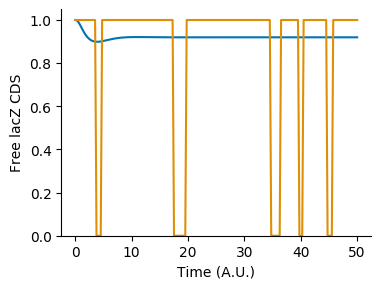

In [12]:
# for subdata in data1.columns[25:]:
#     print(str(subdata))
#     fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
#     ax.plot(data1.index, data1.loc[:, subdata], label = None)
#     ax.plot(data2.index, data2.loc[:, subdata], label = None)
#     ax.set_ylim(bottom = 0)

#     seaborn.despine()
#     plt.show()
    
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
ax.plot(data1.index, data1.loc[:, 'obs_lacz_cds'], label = None, color = palette[0])
ax.plot(data2.index, data2.loc[:, 'obs_lacz_cds'], label = None, color = palette[1])
ax.set_ylim(bottom = 0)
ax.set_xlabel('Time (A.U.)')
ax.set_ylabel('Free lacZ CDS')

seaborn.despine()
# plt.savefig('Model_lacZYA_transcription.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

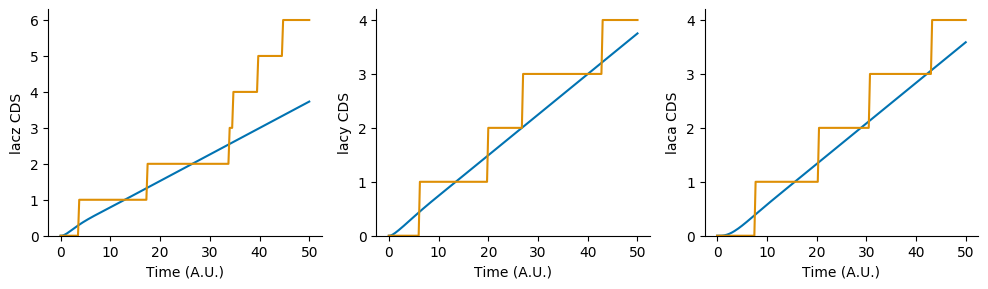

In [13]:
fig, ax = plt.subplots(1, 3, figsize = (4*3, 3*1), dpi = 100)

for obs, ax in zip(['obs_rna_lacz_cds', 'obs_rna_lacy_cds', 'obs_rna_laca_cds'], ax.ravel()):
    ax.plot(data1.index, data1.loc[:, obs], label = None, color = palette[0])
    ax.plot(data2.index, data2.loc[:, obs], label = None, color = palette[1])
    ax.set_ylim(bottom = 0)
    ax.set_xlabel('Time (A.U.)')
    ax.set_ylabel(obs.split('_')[2] + ' CDS')

seaborn.despine()
# plt.savefig('Model_lacZYA_transcription.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

In [14]:
Rule('dr_lacZ_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lacZ', type = 'rbs', prot = None) | cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'rbs', prot = 1), Parameter('fwd_dr_lacZ_rbs', 1), Parameter('rvs_dr_lacZ_rbs', 1))
Rule('dr_lacY_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lacY', type = 'rbs', prot = None) | cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'rbs', prot = 1), Parameter('fwd_dr_lacY_rbs', 1), Parameter('rvs_dr_lacY_rbs', 1))
Rule('dr_lacA_rbs', cplx(name = 'Ribosome', rna = None) + rna(name = 'lacA', type = 'rbs', prot = None) | cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'rbs', prot = 1), Parameter('fwd_dr_lacA_rbs', 1), Parameter('rvs_dr_lacA_rbs', 1))
Rule('fr_lacA_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter1', prot = 1) >> cplx(name = 'Ribosome', rna = None) + rna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_fr_lacA_ter1', 1))
Rule('fr_lacA_ter2', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter2', prot = 1) >> cplx(name = 'Ribosome', rna = None) + rna(name = 'lacA', type = 'ter2', prot = None), Parameter('fwd_fr_lacA_ter2', 1))

Rule('fr_lacA_ter2', cplx(name='Ribosome', rna=1) % rna(name='lacA', type='ter2', prot=1) >> cplx(name='Ribosome', rna=None) + rna(name='lacA', type='ter2', prot=None), fwd_fr_lacA_ter2)

In [15]:
Rule('sr_lacZ_rbs', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'rbs', prot = 1) + None + rna(name = 'lacZ', type = 'cds', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'cds', prot = 1) + prot(name = 'lacZ', up = None, dw = None) + rna(name = 'lacZ', type = 'cds', prot = None), Parameter('fwd_sr_lacZ_rbs', 1))
Rule('sr_lacZ_cds', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacZ', type = 'cds', prot = 1) + rna(name = 'lacY', type = 'pro1', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'pro1', prot = 1) + rna(name = 'lacZ', type = 'cds', prot = None), Parameter('fwd_sr_lacZ_cds', 1))
Rule('sr_lacY_pro1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'pro1', prot = 1) + rna(name = 'lacY', type = 'rbs', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'rbs', prot = 1) + rna(name = 'lacY', type = 'pro1', prot = None), Parameter('fwd_sr_lacY_pro1', 1))
Rule('sr_lacY_rbs', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'rbs', prot = 1) + None + rna(name = 'lacY', type = 'cds', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'cds', prot = 1) + prot(name = 'lacY', up = None, dw = None) + rna(name = 'lacY', type = 'cds', prot = None), Parameter('fwd_sr_lacY_rbs', 1))
Rule('sr_lacY_cds', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacY', type = 'cds', prot = 1) + rna(name = 'lacA', type = 'rbs', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'rbs', prot = 1) + rna(name = 'lacY', type = 'cds', prot = None), Parameter('fwd_sr_lacY_cds', 1))
Rule('sr_lacA_rbs', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'rbs', prot = 1) + None + rna(name = 'lacA', type = 'cds', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'cds', prot = 1) + prot(name = 'lacA', up = None, dw = None) + rna(name = 'lacA', type = 'cds', prot = None), Parameter('fwd_sr_lacA_rbs', 1))
Rule('sr_lacA_cds', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'cds', prot = 1) + rna(name = 'lacA', type = 'ter1', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter1', prot = 1) + rna(name = 'lacA', type = 'cds', prot = None), Parameter('fwd_sr_lacA_cds', 1))
Rule('sr_lacA_ter1', cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter1', prot = 1) + rna(name = 'lacA', type = 'ter2', prot = None) >> cplx(name = 'Ribosome', rna = 1) % rna(name = 'lacA', type = 'ter2', prot = 1) + rna(name = 'lacA', type = 'ter1', prot = None), Parameter('fwd_sr_lacA_ter1', 1))


Rule('sr_lacA_ter1', cplx(name='Ribosome', rna=1) % rna(name='lacA', type='ter1', prot=1) + rna(name='lacA', type='ter2', prot=None) >> cplx(name='Ribosome', rna=1) % rna(name='lacA', type='ter2', prot=1) + rna(name='lacA', type='ter1', prot=None), fwd_sr_lacA_ter1)

In [16]:
Initial(cplx(name = 'Ribosome', dna = None, rna = None), Parameter('t0_ribosome', 1))
Observable('obs_ribosome', cplx(name = 'Ribosome', dna = None, rna = None))
Observable('obs_lacz', prot(name = 'lacZ', up = None, dw = None))
Observable('obs_lacy', prot(name = 'lacY'))
Observable('obs_laca', prot(name = 'lacA'))

Observable('obs_laca', prot(name='lacA'))

In [17]:
generate_network(model)
generate_equations(model)

In [18]:
with open('lactose_gene_expression.kappa', 'w') as outfile:
    outfile.write(export(model, 'kappa'))

In [19]:
data1 = ScipyOdeSimulator(model, linspace(0, 50, 100)).run().dataframe
data2 = BngSimulator(model, linspace(0, 50, 501)).run().dataframe

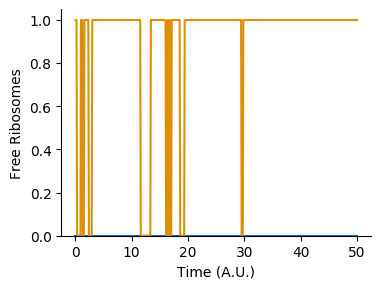

In [20]:
fig, ax = plt.subplots(1, 1, figsize = (4*1, 3*1), dpi = 100)
ax.plot(data1.index, data1.loc[:, 'obs_ribosome'], label = None, color = palette[0])
ax.plot(data2.index, data2.loc[:, 'obs_ribosome'], label = None, color = palette[1])
ax.set_ylim(bottom = 0)
ax.set_xlabel('Time (A.U.)')
ax.set_ylabel('Free Ribosomes')

seaborn.despine()
# plt.savefig('Model_lacZYA_transcription.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()

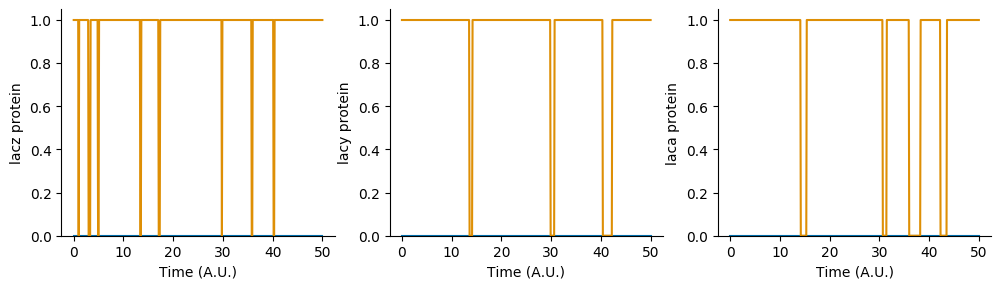

In [21]:
fig, ax = plt.subplots(1, 3, figsize = (4*3, 3*1), dpi = 100)

for obs, ax in zip(['obs_lacz', 'obs_lacy', 'obs_laca'], ax.ravel()):
    ax.plot(data1.index, data1.loc[:, obs], label = None, color = palette[0])
    ax.plot(data2.index, data2.loc[:, obs], label = None, color = palette[1])
    ax.set_ylim(bottom = 0)
    ax.set_xlabel('Time (A.U.)')
    ax.set_ylabel(obs.split('_')[1] + ' protein')

seaborn.despine()
# plt.savefig('Model_lacZYA_transcription.png', format = 'png', bbox_inches = 'tight', dpi = 300)
plt.show()